### ResNet

In [1]:
import jax.numpy as jnp

def mlp(params, inputs):
    for w, b in params:
        outputs = jnp.dot(inputs, w) + b  
        inputs = jnp.tanh(outputs)        
    return outputs

In [2]:
def resnet(params, inputs, depth):
    for i in range(depth):
        outputs = mlp(params, inputs) + inputs
    return outputs


In [3]:
import numpy.random as npr
from jax import jit, grad, vmap

resnet_depth = 3

def resnet_squared_loss(params, inputs, targets):
    preds = resnet(params, inputs, resnet_depth)
    return jnp.mean(jnp.sum((preds - targets)**2, axis=1))

def init_random_params(scale, layer_sizes, rng=npr.RandomState(0)):
    return [(scale * rng.randn(m, n), scale * rng.randn(n))
          for m, n, in zip(layer_sizes[:-1], layer_sizes[1:])]

@jit
def resnet_update(params, inputs, targets):
    grads = grad(resnet_squared_loss)(params, inputs, targets)
    return [(w - step_size * dw, b - step_size * db)
          for (w, b), (dw, db) in zip(params, grads)]



Text(0, 0.5, 'output')

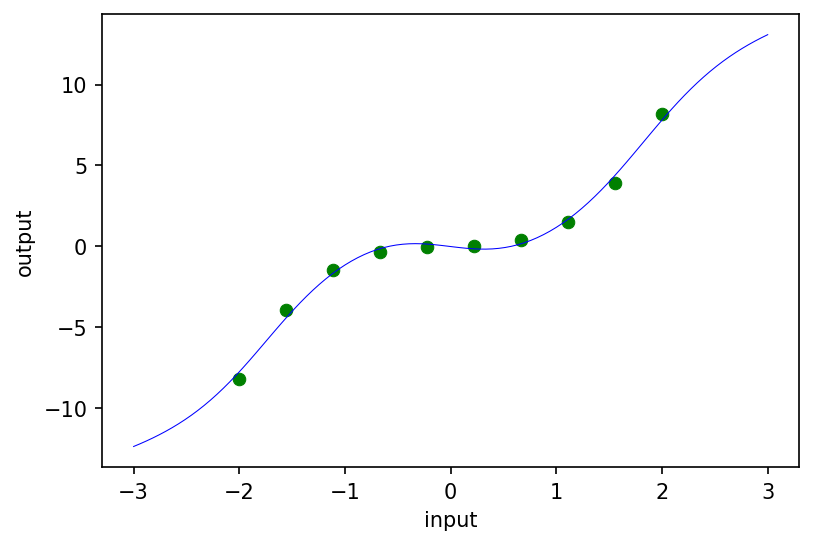

In [4]:
inputs = jnp.reshape(jnp.linspace(-2.0, 2.0, 10), (10, 1))
targets = inputs**3 + 0.1 * inputs

# Hyperparameters.
layer_sizes = [1, 20, 1]
param_scale = 1.0
step_size = 0.01
train_iters = 1000

# Initialize and train.
resnet_params = init_random_params(param_scale, layer_sizes)

for i in range(train_iters):
    resnet_params = resnet_update(resnet_params, inputs, targets)

# Plot results.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4), dpi=150)
ax = fig.gca()
ax.scatter(inputs, targets, lw=0.5, color='green')
fine_inputs = jnp.reshape(jnp.linspace(-3.0, 3.0, 100), (100, 1))
ax.plot(fine_inputs, resnet(resnet_params, fine_inputs, resnet_depth), lw=0.5, color='blue')
ax.set_xlabel('input')
ax.set_ylabel('output')

### ODENet

In [117]:
import jax
def nn_dynamics(state, time, params):
    state_and_time = jnp.hstack([state, jnp.array(time)])
    #jax.debug.print("{state_and_time}",state_and_time=state_and_time )
    return mlp(params, state_and_time)

In [118]:
from jax.experimental.ode import odeint

def odenet(params, input):
    start_and_end_times = jnp.array([0.0, 1.0])
    init_state, final_state = odeint(nn_dynamics, input, start_and_end_times, params)
    return final_state

In [119]:
batched_odenet = vmap(odenet, in_axes=(None, 0))


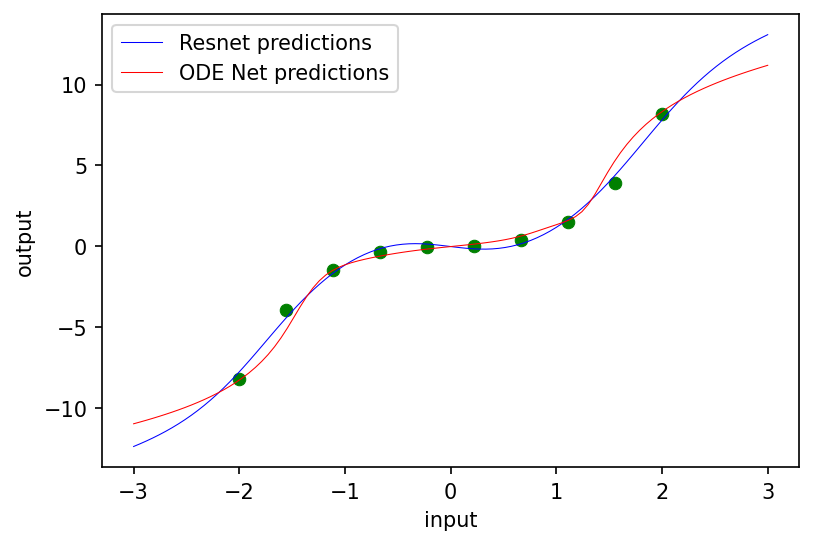

In [120]:
odenet_layer_sizes = [2, 20, 1]

def odenet_loss(params, inputs, targets):
    preds = batched_odenet(params, inputs)
    
    return jnp.mean(jnp.sum((preds - targets)**2, axis=1))

@jit
def odenet_update(params, inputs, targets):
    grads = grad(odenet_loss)(params, inputs, targets)
    return [(w - step_size * dw, b - step_size * db)
          for (w, b), (dw, db) in zip(params, grads)]

odenet_params = init_random_params(param_scale, odenet_layer_sizes)

for i in range(train_iters):
    odenet_params = odenet_update(odenet_params, inputs, targets)

# Plot resulting model.
fig = plt.figure(figsize=(6, 4), dpi=150)
ax = fig.gca()
ax.scatter(inputs, targets, lw=0.5, color='green')
fine_inputs = jnp.reshape(jnp.linspace(-3.0, 3.0, 100), (100, 1))
ax.plot(fine_inputs, resnet(resnet_params, fine_inputs, resnet_depth), lw=0.5, color='blue')
ax.plot(fine_inputs, batched_odenet(odenet_params, fine_inputs), lw=0.5, color='red')
ax.set_xlabel('input')
ax.set_ylabel('output')
plt.legend(('Resnet predictions', 'ODE Net predictions'))


(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)


Text(0, 0.5, 'time / depth')

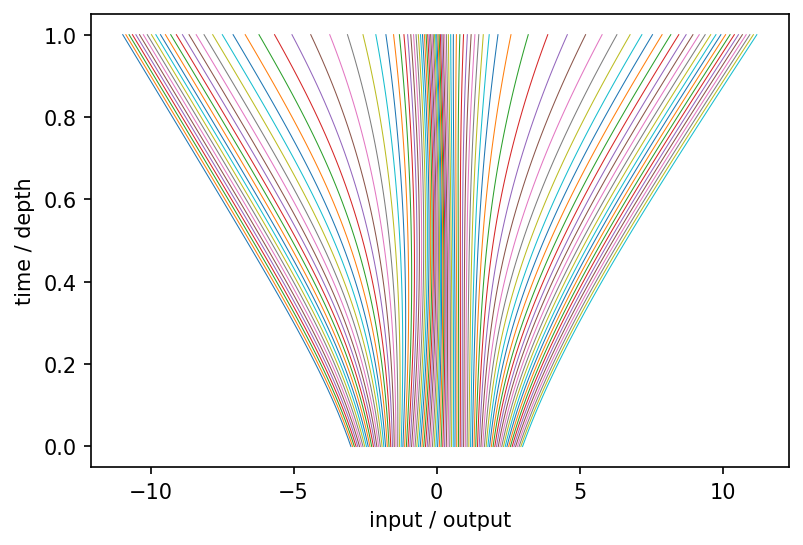

In [128]:
fig = plt.figure(figsize=(6, 4), dpi=150)
ax = fig.gca()

@jit
def odenet_times(params, input, times):
    def dynamics_func(state, time, params):
        return mlp(params, jnp.hstack([state, jnp.array(time)]))
    return odeint(dynamics_func, input, times, params)

times = jnp.linspace(0.0, 1.0, 50)
y0 = jnp.reshape(jnp.linspace(-3.0, 3.0, 100), (100, 1))


for i in y0:
    y_o = odenet_times(odenet_params, i, times)
    print(y_o.shape)
    ax.plot(y_o, times, lw=0.5)

ax.set_xlabel('input / output')
ax.set_ylabel('time / depth')